# Z3 SAT Exercises

> Before trying to solve the exercises contained in this notebook, the reader is suggested to have gained experience with the tool through the `Tutorial.ipynb` notebook.

In [1]:
!pip3 install z3-solver


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from itertools import combinations
import z3
from utils import *

## Useful contraints

In [9]:
def at_least_one(bool_vars):
    for el in bool_vars:
        if el:
            return True
    return False

def at_most_one(bool_vars):
    for el in combinations(bool_vars):
        if el and el:
            return False
    return True

def exactly_one(bool_vars):
    i = 0
    for el in bool_vars:
        if el:
            if i > 0:
                return False
            else:
                i+=1
    return True

## Knights and Knaves

In [11]:
def is_knight(bool):
    return str(bool) == "knight"

AisKnight = Bool('knight')
BisKnight = Bool('knave')
s = Solver()

z3.

AisKnight = is_knight(AisKnight)
#BisKnight = is_knight(BisKnight)
# Unicity check
s.add(Not(And(AisKnight, BisKnight)))
print(s.check())
s.model()

# Check model is sat

NameError: name 'Bool' is not defined

## Coloring graph

Another famous problem is the [coloring graph](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjAlpGV4az2AhUP2aQKHY_5BQwQFnoECAQQAQ&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FGraph_coloring&usg=AOvVaw0F_XS2AN3uz4G-IJx5Q8j0). 

Given a graph $({v_1,...,v_n},E)$ and $d$ colors, we need to assign a color to each vertex, s.t. if $(v_i,v_j) ∈ E$ then color of $v_i$ is different from color of $v_j$. 

In [119]:
def coloring_graph_sat(n, d, E):
    # Create the variables, x_i_j = 1 iff vertex i is colored with color j.
    bool_vertex =  [Int('x_{}_{}'.format(k,i)) for k in range(d) for i in range(n)]
    # Solver instance
    s = Solver()
    # Each vertex has at least one color

    for i in range(n):
        vertex_c = [Or(bool_vertex[i*d + k] == 1) for k in range(d)]
        s.add(vertex_c)

    # Each edge must have different colors in its vertices
    for el in combinations(bool_vertex,2):
        s.add(Not(Distinct(el[0],el[1])))
    # Check model
    print(s.check())
    print(s.model())

In [80]:
instance1 = {
        "n" : 5,
        "d": 3,
        "E" : [
            (0, 2),
            (0, 4),
            (1, 2),
            (1, 4),
            (2, 3), 
            (3, 4)
        ]
    }
instance2 = {
        "n":10,
        "d":3,
        "E":[
            (0, 1),
            (0, 4),
            (0, 5),
            (1, 2),
            (1, 6),
            (2, 7),
            (2, 3),
            (3, 8),
            (3, 4),
            (4, 9),
            (9, 6),
            (9, 7),
            (6, 8),
            (5, 7),
            (5, 8), 
        ]
}

In [120]:
instance = instance1
coloring_graph_sat(instance["n"], instance["d"], instance["E"])


sat
[x_2_4 = 1,
 x_2_0 = 1,
 x_1_0 = 1,
 x_1_1 = 1,
 x_0_0 = 1,
 x_2_2 = 1,
 x_0_3 = 1,
 x_2_1 = 1,
 x_1_3 = 1,
 x_1_2 = 1,
 x_2_3 = 1,
 x_0_2 = 1,
 x_0_4 = 1,
 x_0_1 = 1,
 x_1_4 = 1]


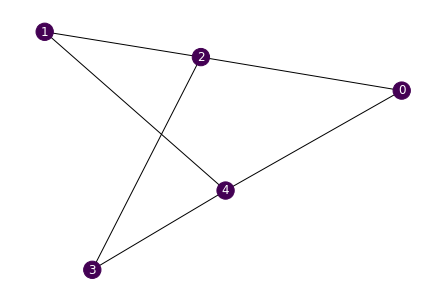

In [87]:
display_color_graph(E = instance["E"])

sat
[x_2_4 = 1,
 x_2_0 = 1,
 x_1_0 = 1,
 x_1_1 = 1,
 x_0_0 = 1,
 x_2_2 = 1,
 x_0_3 = 1,
 x_2_1 = 1,
 x_1_3 = 1,
 x_1_2 = 1,
 x_2_3 = 1,
 x_0_2 = 1,
 x_0_4 = 1,
 x_0_1 = 1,
 x_1_4 = 1]
CPU times: total: 46.9 ms
Wall time: 52.6 ms


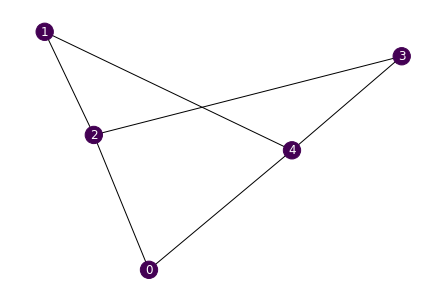

In [121]:
%%time
display_color_graph(sol = coloring_graph_sat(instance["n"], instance["d"], instance["E"]), E = instance["E"])

## N-Queens

The [n-queens problem](https://en.wikipedia.org/wiki/Eight_queens_puzzle) is the problem of placing n chess queens in a $nxn$ chessboard so that no two queens threaten each other. In light of this, the solution requires that no two queens share the same row, column, or diagonal.

In [ ]:
def nqueens_sat(n):
    # Create all the variables

    # Create the solver instance

    # At least one on each row and column

    # At most one on each row and column

    # Add the diagonal constraints
    
    # Check model 
    pass

In [ ]:
%%time
display_nqueens(nqueens_sat(20))

## Sudoku

[Sudoku](https://en.wikipedia.org/wiki/Sudoku) is a logic-based, combinatorial number-placement puzzle. In classic sudoku, the objective is to fill a 9 × 9 grid with digits so that each column, each row, and each of the nine 3 × 3 subgrids that compose the grid contain all of the digits from 1 to 9. 

In [6]:
# Sudoku instances, '0's correspond to empty cells

instance1 = ((0, 0, 0, 0, 9, 4, 0, 3, 0),
             (0, 0, 0, 5, 1, 0, 0, 0, 7),
             (0, 8, 9, 0, 0, 0, 0, 4, 0),
             (0, 0, 0, 0, 0, 0, 2, 0, 8),
             (0, 6, 0, 2, 0, 1, 0, 5, 0),
             (1, 0, 2, 0, 0, 0, 0, 0, 0),
             (0, 7, 0, 0, 0, 0, 5, 2, 0),
             (9, 0, 0, 0, 6, 5, 0, 0, 0),
             (0, 4, 0, 9, 7, 0, 0, 0, 0))

instance2 = ((0, 0, 0, 0, 9, 0, 1, 0, 0),
             (2, 8, 0, 0, 0, 5, 0, 0, 0),
             (7, 0, 0, 0, 0, 6, 4, 0, 0),
             (8, 0, 5, 0, 0, 3, 0, 0, 6),
             (0, 0, 1, 0, 0, 4, 0, 0, 0),
             (0, 7, 0, 2, 0, 0, 0, 0, 0),
             (3, 0, 0, 0, 0, 1, 0, 8, 0),
             (0, 0, 0, 0, 0, 0, 0, 5, 0),
             (0, 9, 0, 0, 0, 0, 0, 7, 0))

instance3 = ((0, 7, 0, 0, 0, 0, 0, 4, 9),
             (0, 0, 0, 4, 0, 0, 0, 0, 0),
             (4, 0, 3, 5, 0, 7, 0, 0, 8),
             (0, 0, 7, 2, 5, 0, 4, 0, 0),
             (0, 0, 0, 0, 0, 0, 8, 0, 0),
             (0, 0, 4, 0, 3, 0, 5, 9, 2),
             (6, 1, 8, 0, 0, 0, 0, 0, 5),
             (0, 9, 0, 1, 0, 0, 0, 3, 0),
             (0, 0, 5, 0, 0, 0, 0, 0, 7))

instance4 = ((0, 0, 0, 0, 0, 6, 0, 0, 0),
             (0, 5, 9, 0, 0, 0, 0, 0, 8),
             (2, 0, 0, 0, 0, 8, 0, 0, 0),
             (0, 4, 5, 0, 0, 0, 0, 0, 0),
             (0, 0, 3, 0, 0, 0, 0, 0, 0),
             (0, 0, 6, 0, 0, 3, 0, 5, 4),
             (0, 0, 0, 3, 2, 5, 0, 0, 6),
             (0, 0, 0, 0, 0, 0, 0, 0, 0),
             (0, 0, 0, 0, 0, 0, 0, 0, 0))

In [33]:
def sudoku_sat(instance):
    # All the variables we need: for each cell, nine variables that determine which digit must be assigned.
    grid = [[Int(f'cell_{r}_{c}') for c in range(9)] for r in range(9)]
    s = Solver()

    for r in range(9):
        for c in range(9):
            if instance[r][c] != 0:
                s.add(grid[r][c] == instance[r][c])
            else:
                s.add(grid[r][c] >= 1)
                s.add(grid[r][c] <= 9)
    # A cell has only one value
    
    # Each value is used only once in a row
    for r in range(9):
        s.add(Distinct(grid[r]))
    # Each value used exactly once in each column
    for c in range(9):
        s.add(Distinct([grid[r][c] for r in range(9)]))
    # Each value used exactly once in each 3x3 grid.
    for r in range(0,9,3):
        for c in range(0,9,3):
            s.add(Distinct(([grid[r+i][c+k] for i in range(3) for k in range(3)])))
    # Some numbers are already available
    if s.check() == sat:
        m = s.model()
        r = [ [ m.evaluate(grid[i][j]).as_long() for j in range(9) ]
          for i in range(9) ]
        return r
    else:
        print ("failed to solve")

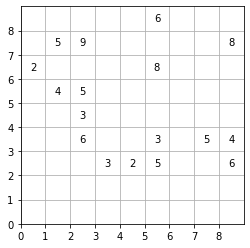

In [34]:
# Select the instance you want to solve
instance = instance4
display_sudoku(instance)

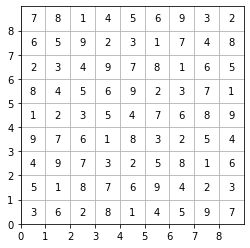

CPU times: total: 734 ms
Wall time: 849 ms


In [35]:
%%time
display_sudoku(sudoku_sat(instance))

## Nurse scheduling problem

In the next example, called [nurse scheduling problem](https://en.wikipedia.org/wiki/Nurse_scheduling_problem), a hospital supervisor needs to create a schedule for $n$ nurses over a fixed day period, subject to the following conditions:

- Each day is divided into three 8-hour shifts.
- Every day, each shift is assigned to a single nurse, and no nurse works more than one shift.
- Each nurse is assigned to a minimum amount of shifts during the given days period.


In [ ]:
instance1 = {
    "num_nurses" : 4,
    "num_shifts" : 3,
    "num_days" : 3
}

instance2 = {
    "num_nurses" : 4,
    "num_shifts" : 3,
    "num_days" : 4
}

### Advanced useful contraints

In [ ]:
def at_least_k_np(bool_vars, k):
    pass

def at_most_k_np(bool_vars, k):
    pass

def exactly_k_np(bool_vars, k):
    pass

## Try it yourself!

Try to model the variables and constraints to solve the nurse scheduling problem, starting from the examples listed above. 

If possible, shifts should be distributed evenly and fairly, so that each nurse works the minimum amount of them. If this is not possible, because the total number of shifts is not divisible by the number of nurses, some nurses will be assigned one more shift, without crossing the maximum number of shifts which can be worked by each nurse

In [ ]:
def nurse_scheduling_sat(num_nurses, num_shifts, num_days):
    # Create all the variables, shifts[i, j, k] is True if shift k is assigned to nurse i on day j.
    
    # In each shift can work just one nurse
    
    # Each nurse can work just one shift per day 
    
    # Fair assignment of shifts
    pass
    

In [ ]:
instance = instance1

In [ ]:
%%time
display_nurses_shifts(nurse_scheduling_sat(instance["num_nurses"], instance["num_shifts"], instance["num_days"]), instance["num_nurses"], instance["num_shifts"], instance["num_days"])

In [ ]:
instance = instance2

In [ ]:
%%time
display_nurses_shifts(nurse_scheduling_sat(instance["num_nurses"], instance["num_shifts"], instance["num_days"]), instance["num_nurses"], instance["num_shifts"], instance["num_days"])